In [1]:
import pandas as pd
import numpy as np

In [2]:
#loading the dataset

data = pd.read_pickle('Group_1_data_cleaned.pkl')
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
1,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
2,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
3,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,1
4,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,1
5,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274650 entries, 1 to 311028
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   duration                     274650 non-null  int64   
 1   protocol_type                274650 non-null  category
 2   service                      274650 non-null  category
 3   flag                         274650 non-null  category
 4   src_bytes                    274650 non-null  int64   
 5   dst_bytes                    274650 non-null  int64   
 6   land                         274650 non-null  category
 7   wrong_fragment               274650 non-null  category
 8   urgent                       274650 non-null  category
 9   hot                          274650 non-null  float64 
 10  num_failed_logins            274650 non-null  float64 
 11  logged_in                    274650 non-null  category
 12  num_compromised              274650 non-null

In [77]:
columns = ['protocol_type','service','flag','land','wrong_fragment','urgent','logged_in','root_shell',
                                'su_attempted','num_shells','num_access_files','num_outbound_cmds','is_host_login',
                                'is_guest_login','label']
from sklearn.preprocessing import LabelEncoder

for i in columns:
    data[i] = LabelEncoder().fit_transform(data[i])
    
data.head()



,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
1,0,2,45,4,105,146,0,0,0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
2,0,2,45,4,105,146,0,0,0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
3,0,2,45,4,105,146,0,0,0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,1
4,0,2,45,4,105,146,0,0,0,0.0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,1
5,0,2,45,4,105,146,0,0,0,0.0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,1


In [73]:
data = ((data - data.min()) / (data.max() - data.min()))
data.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
count,274650.000000,274650.000000,274650.000000,274650.000000,274650.000000,274650.000000,0.0,274650.000000,0.0,0.0,...,274650.000000,274650.000000,274650.000000,274650.000000,274650.000000,274650.000000,0.0,274650.000000,274650.000000,274650.000000
mean,0.000738,0.245860,0.373207,0.891395,0.003244,0.010505,NaN,0.000135,NaN,NaN,...,0.844302,0.852442,0.085912,0.610619,0.025385,0.001498,NaN,0.146527,0.145991,0.811990
std,0.018726,0.327978,0.216219,0.262976,0.030698,0.051749,NaN,0.011288,NaN,NaN,...,0.346315,0.340995,0.175067,0.482677,0.099123,0.028214,NaN,0.352124,0.352827,0.390721
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.225806,1.000000,0.000370,0.000000,NaN,0.000000,NaN,NaN,...,0.996078,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.225806,1.000000,0.001833,0.000000,NaN,0.000000,NaN,NaN,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,0.000000,0.000000,1.000000
75%,0.000000,0.500000,0.693548,1.000000,0.003639,0.000000,NaN,0.000000,NaN,NaN,...,1.000000,1.000000,0.076923,1.000000,0.000000,0.000000,NaN,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000


In [78]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)


     

centroids = random_centroids(data, 5)

In [79]:
centroids

,0,1,2,3,4
duration,115.0,0.00,0.0,0.00,0.00
protocol_type,1.0,0.00,0.0,1.00,1.00
service,45.0,49.00,14.0,14.00,14.00
flag,4.0,4.00,1.0,1.00,4.00
src_bytes,1032.0,1032.00,0.0,520.00,1032.00
dst_bytes,0.0,260.00,0.0,0.00,0.00
land,0.0,0.00,0.0,0.00,0.00
wrong_fragment,0.0,0.00,0.0,0.00,0.00
urgent,0.0,0.00,0.0,0.00,0.00
hot,0.0,0.00,0.0,0.00,0.00


In [80]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)


     

labels = get_labels(data, centroids)


     

labels.value_counts()

3    92497
0    76609
2    48301
4    38922
1    18321
dtype: int64

In [81]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids


In [82]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output


     

def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()


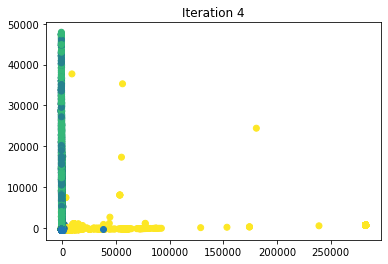

In [84]:
max_iterations = 5
centroid_count = 10

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [6]:

import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [85]:
#loading the dataset

df = pd.read_pickle('Group_1_data_cleaned.pkl')
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
1,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
2,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
3,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,1
4,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,1
5,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,1


In [4]:
columns = ['protocol_type','service','flag','land','wrong_fragment','urgent','logged_in','root_shell',
                                'su_attempted','num_shells','num_access_files','num_outbound_cmds','is_host_login',
                                'is_guest_login','label']
from sklearn.preprocessing import LabelEncoder

for i in columns:
    data[i] = LabelEncoder().fit_transform(data[i])
    
data.head()



,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
1,0,2,45,4,105,146,0,0,0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
2,0,2,45,4,105,146,0,0,0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
3,0,2,45,4,105,146,0,0,0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,1
4,0,2,45,4,105,146,0,0,0,0.0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,1
5,0,2,45,4,105,146,0,0,0,0.0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,1


In [7]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)

In [8]:
kmeans = KMeans(   init="random",   n_clusters=3,     n_init=10,    max_iter=300,    random_state=42)

In [9]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [10]:
kmeans.inertia_

3661130.388271803

In [11]:
kmeans.cluster_centers_

array([[-3.93942949e-02, -7.41923022e-01, -6.75887081e-01,
         4.12987304e-01, -7.09117964e-03, -2.02941855e-01,
         0.00000000e+00, -1.19346264e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -4.36819979e-01,
         0.00000000e+00,  0.00000000e+00, -1.90814331e-03,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -2.36166336e-02,  0.00000000e+00,  0.00000000e+00,
        -2.69852706e-03,  6.60069156e-01,  7.13636140e-01,
        -2.73428351e-02,  0.00000000e+00, -4.14037113e-01,
        -4.14133498e-01,  4.11845932e-01, -4.07989684e-01,
        -2.06193585e-01,  2.95238888e-01,  4.48221438e-01,
         4.31922900e-01, -4.89175435e-01,  8.05745656e-01,
        -2.55967621e-01, -5.27262443e-02,  0.00000000e+00,
        -4.15943873e-01, -4.13777123e-01,  4.74731436e-01],
       [ 1.14864234e-01,  1.29795000e+00,  6.84093929e-01,
         4.10777194e-01,  7.69509228e-02,  5.92048091e-01,
         0.00000000e+00,  3.48162634e-02,  0.00000000e+

In [12]:
kmeans.n_iter_

3

In [13]:
kmeans_kwargs = {   "init": "random",   "n_init": 10,    "max_iter": 300,    "random_state": 42}
   
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

### Plotting elbow curve for best value of clusters (k)

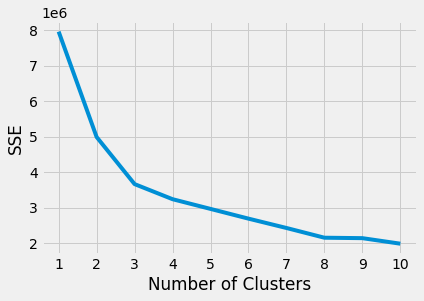

In [14]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [15]:
kl = KneeLocator(  range(1, 11), sse, curve="convex", direction="decreasing" )
kl.elbow

3

In [16]:
kmeans.score(scaled_features)

-1978858.433506998

In [19]:
from sklearn.metrics import silhouette_samples, silhouette_score

score_list =[]
score = silhouette_score(scaled_features, kmeans.labels_)
score_list.append(score)
score_list

[0.721765361731359]